In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('FINAL.csv')
df

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Black,95,50,100,6.5,1000,20,Sugarcane,Urea
...,...,...,...,...,...,...,...,...,...
4508,Black,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,Black,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,Black,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,Black,145,80,150,7.0,1400,30,Sugarcane,MOP


In [3]:
df.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Black,75,50,100,6.5,1000,20,Sugarcane,Urea
1,Black,80,50,100,6.5,1000,20,Sugarcane,Urea
2,Black,85,50,100,6.5,1000,20,Sugarcane,Urea
3,Black,90,50,100,6.5,1000,20,Sugarcane,Urea
4,Black,95,50,100,6.5,1000,20,Sugarcane,Urea


In [4]:
df.tail()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
4508,Black,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,Black,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,Black,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,Black,145,80,150,7.0,1400,30,Sugarcane,MOP
4512,Black,150,80,150,7.0,1400,30,Sugarcane,MOP


In [5]:
df.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


In [6]:
df.isnull().sum()
#does not contain any missing values

Soil_color     0
Nitrogen       0
Phosphorus     0
Potassium      0
pH             0
Rainfall       0
Temperature    0
Crop           0
Fertilizer     0
dtype: int64

In [7]:
df.size

40617

In [8]:
df.shape

(4513, 9)

In [9]:
df.columns

Index(['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall',
       'Temperature', 'Crop', 'Fertilizer'],
      dtype='object')

In [10]:
df['Crop'].unique()

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

# Outlier Removal

In [4]:
import numpy as np
import pandas as pd

# Assuming 'FINAL.csv' is the name of your crop recommendation dataset file
df_crop = pd.read_csv('FINAL.csv')

# Display the first few rows of the DataFrame
print(df_crop.head())


  Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  Temperature  \
0      Black        75          50        100  6.5      1000           20   
1      Black        80          50        100  6.5      1000           20   
2      Black        85          50        100  6.5      1000           20   
3      Black        90          50        100  6.5      1000           20   
4      Black        95          50        100  6.5      1000           20   

        Crop Fertilizer  
0  Sugarcane       Urea  
1  Sugarcane       Urea  
2  Sugarcane       Urea  
3  Sugarcane       Urea  
4  Sugarcane       Urea  


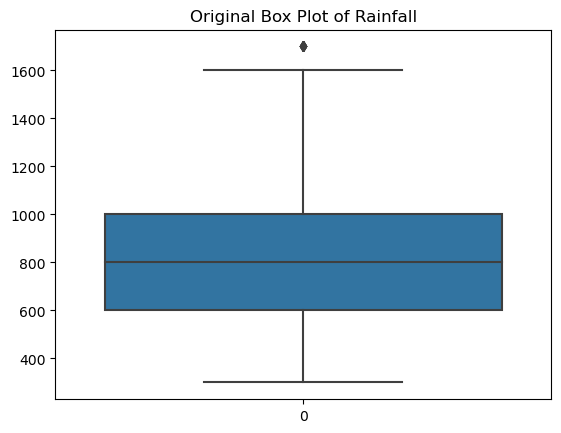

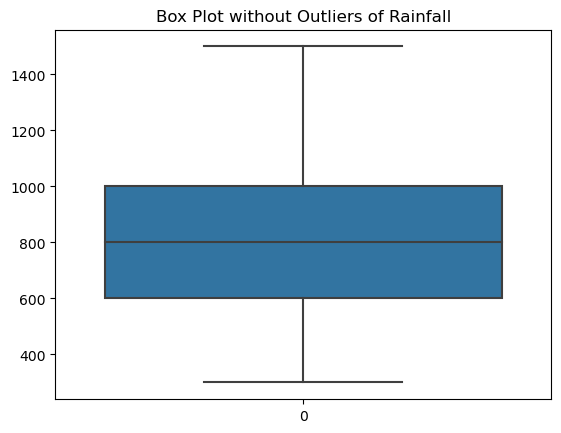

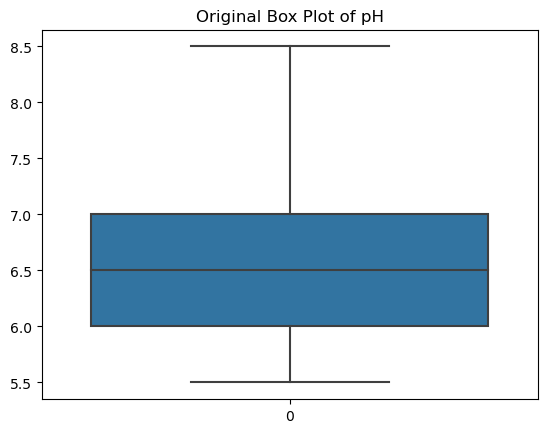

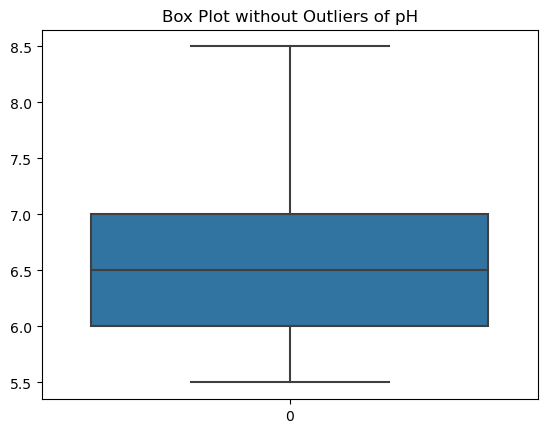

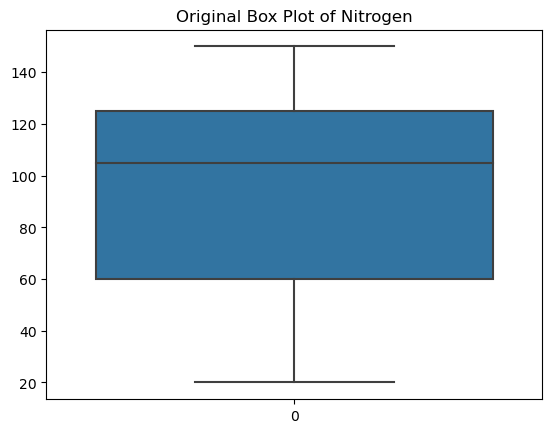

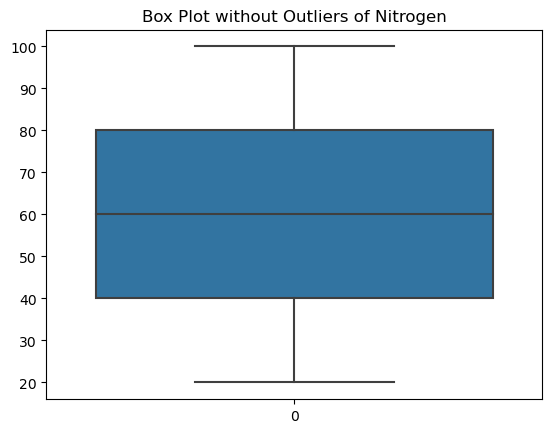

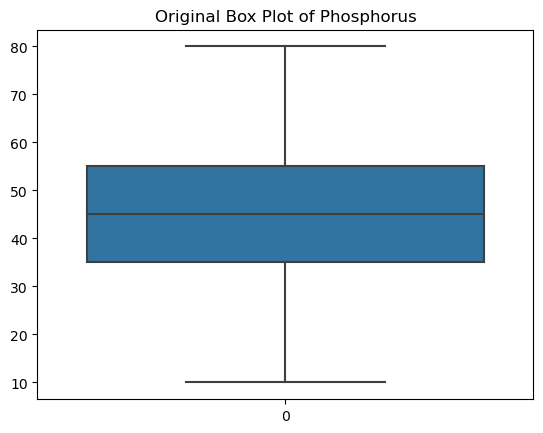

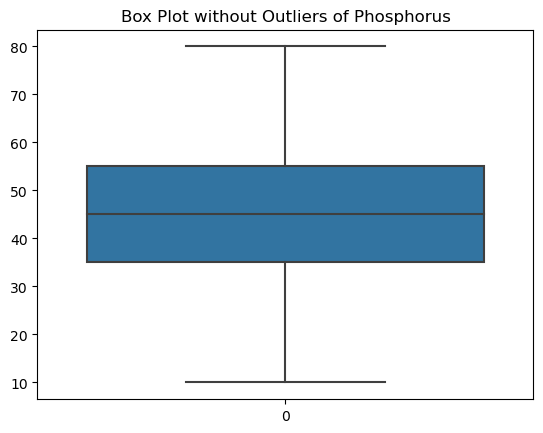

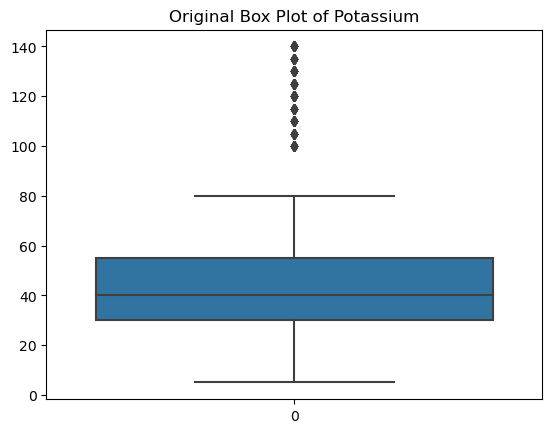

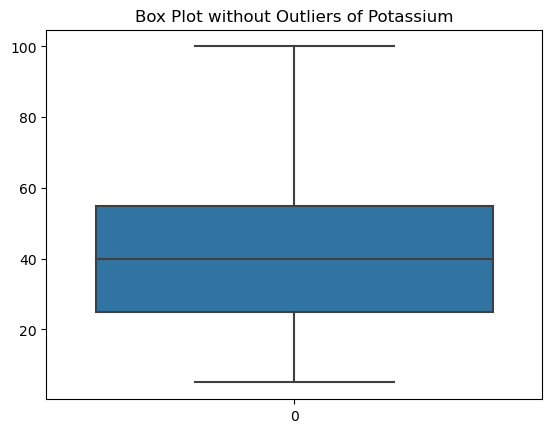

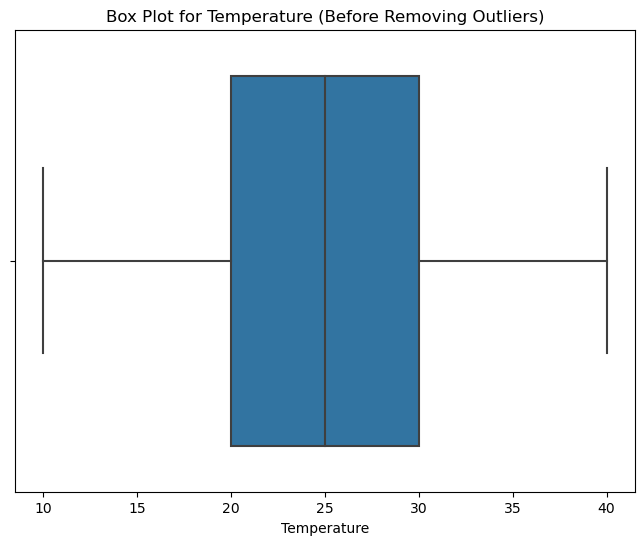

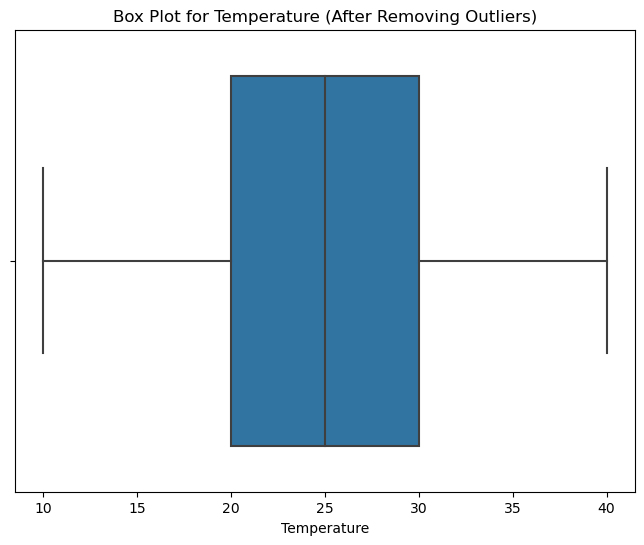

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers

# Outlier removal for Rainfall
threshold_value = 1500
no_outliers = removal_box_plot(df_crop, 'Rainfall', threshold_value)

# Outlier removal for pH
threshold_value = 8.9
no_outliers = removal_box_plot(df_crop, 'pH', threshold_value)

# Outlier removal for Nitrogen, Phosphorus, and Potassium
def removal_box_plot_multiple(df, columns, threshold):
    for column in columns:
        sns.boxplot(df[column])
        plt.title(f'Original Box Plot of {column}')
        plt.show()

        df = df[df[column] <= threshold]

        sns.boxplot(df[column])
        plt.title(f'Box Plot without Outliers of {column}')
        plt.show()

    return df

threshold_value = 100
columns_to_remove_outliers = ['Nitrogen', 'Phosphorus', 'Potassium']
no_outliers_df = removal_box_plot_multiple(df_crop, columns_to_remove_outliers, threshold_value)

import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Box plot for Temperature before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_crop['Temperature'])
plt.title('Box Plot for Temperature (Before Removing Outliers)')
plt.xlabel('Temperature')
plt.show()

# Remove outliers for Temperature
df_no_outliers = remove_outliers_iqr(df_crop, 'Temperature')

# Box plot for Temperature after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Temperature'])
plt.title('Box Plot for Temperature (After Removing Outliers)')
plt.xlabel('Temperature')
plt.show()


# Data Preprocessing

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset from a CSV file
df = pd.read_csv('FINAL.csv')

# Drop any rows with missing values, if necessary
df.dropna(inplace=True)

# Lowercase column names
df.columns = df.columns.str.lower()

# Clean the 'soil_color' column
df['soil_color'] = df['soil_color'].str.strip().str.lower()

# Function to remove outliers using a threshold value
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

# Outlier removal for rainfall and ph
df = removal_box_plot(df, 'rainfall', 1500)
df = removal_box_plot(df, 'ph', 8.9)

# Function to remove outliers using a threshold value for multiple columns
def removal_box_plot_multiple(df, columns, threshold):
    for column in columns:
        df = df[df[column] <= threshold]
    return df

# Outlier removal for nitrogen, phosphorus, and potassium
columns_to_remove_outliers = ['nitrogen', 'phosphorus', 'potassium']
df = removal_box_plot_multiple(df, columns_to_remove_outliers, 100)

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers for temperature
df = remove_outliers_iqr(df, 'temperature')

# Encode categorical variables (soil_color, crop)
label_encoder = LabelEncoder()
df['soil_color'] = label_encoder.fit_transform(df['soil_color'])
df['crop'] = label_encoder.fit_transform(df['crop'])

# Define the input features (X) and target variable (y) after outlier removal
X = df[['temperature', 'rainfall', 'soil_color', 'ph', 'crop']]
y = df[['nitrogen', 'phosphorus', 'potassium']]

# Columns to impute
columns_to_impute = ['temperature', 'rainfall', 'ph']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now, you can use X_train, X_test, y_train, y_test in your existing code


C:\Users\shrey\AppData\Local\Temp\ipykernel_8952\1784808323.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


# 1st ML Model:- Random Forest Regressor

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
df = pd.read_csv('FINAL.csv')

# Drop any rows with missing values, if necessary
df.dropna(inplace=True)

# Lowercase column names
df.columns = df.columns.str.lower()

# Clean the 'soil_color' column
df['soil_color'] = df['soil_color'].str.strip().str.lower()

# Function to remove outliers using a threshold value
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

# Outlier removal for rainfall and ph
df = removal_box_plot(df, 'rainfall', 1500)
df = removal_box_plot(df, 'ph', 8.9)

# Function to remove outliers using a threshold value for multiple columns
def removal_box_plot_multiple(df, columns, threshold):
    for column in columns:
        df = df[df[column] <= threshold]
    return df

# Outlier removal for nitrogen, phosphorus, and potassium
columns_to_remove_outliers = ['nitrogen', 'phosphorus', 'potassium']
df = removal_box_plot_multiple(df, columns_to_remove_outliers, 100)

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers for temperature
df = remove_outliers_iqr(df, 'temperature')

# Encode categorical variables (soil_color, crop)
label_encoder = LabelEncoder()
df['soil_color'] = label_encoder.fit_transform(df['soil_color'])
df['crop'] = label_encoder.fit_transform(df['crop'])

# Define the input features (X) and target variable (y) after outlier removal
X = df[['temperature', 'rainfall', 'soil_color', 'ph', 'crop']]
y = df[['nitrogen', 'phosphorus', 'potassium']]

# Columns to impute
columns_to_impute = ['temperature', 'rainfall', 'ph']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing data
y_test_pred = model.predict(X_test)

# Calculate and print the mean squared error for each target variable
test_mse_nitrogen = mean_squared_error(y_test['nitrogen'], y_test_pred[:, 0])
test_mse_phosphorus = mean_squared_error(y_test['phosphorus'], y_test_pred[:, 1])
test_mse_potassium = mean_squared_error(y_test['potassium'], y_test_pred[:, 2])

print("Testing Mean Squared Error for Nitrogen:", test_mse_nitrogen)
print("Testing Mean Squared Error for Phosphorus:", test_mse_phosphorus)
print("Testing Mean Squared Error for Potassium:", test_mse_potassium)


C:\Users\shrey\AppData\Local\Temp\ipykernel_8952\3618939937.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


Testing Mean Squared Error for Nitrogen: 67.18459560412293
Testing Mean Squared Error for Phosphorus: 42.028495604970594
Testing Mean Squared Error for Potassium: 20.8153685321004


In [20]:
import pickle

# Save the trained model to a .pkl file
with open('nutrient_recommendation_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
df = pd.read_csv('FINAL.csv')

# Drop any rows with missing values, if necessary
df.dropna(inplace=True)

# Lowercase column names
df.columns = df.columns.str.lower()

# Clean the 'soil_color' column
df['soil_color'] = df['soil_color'].str.strip().str.lower()

# Function to remove outliers using a threshold value
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

# Outlier removal for rainfall and ph
df = removal_box_plot(df, 'rainfall', 1500)
df = removal_box_plot(df, 'ph', 8.9)

# Function to remove outliers using a threshold value for multiple columns
def removal_box_plot_multiple(df, columns, threshold):
    for column in columns:
        df = df[df[column] <= threshold]
    return df

# Outlier removal for nitrogen, phosphorus, and potassium
columns_to_remove_outliers = ['nitrogen', 'phosphorus', 'potassium']
df = removal_box_plot_multiple(df, columns_to_remove_outliers, 100)

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers for temperature
df = remove_outliers_iqr(df, 'temperature')

# Encode categorical variables (soil_color, crop)
label_encoder = LabelEncoder()
df['soil_color'] = label_encoder.fit_transform(df['soil_color'])
df['crop'] = label_encoder.fit_transform(df['crop'])

# Define the input features (X) and target variable (y) after outlier removal
X = df[['temperature', 'rainfall', 'soil_color', 'ph', 'crop']]
y = df[['nitrogen', 'phosphorus', 'potassium']]

# Columns to impute
columns_to_impute = ['temperature', 'rainfall', 'ph']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Cross-validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
nitrogen_errors = []
phosphorus_errors = []
potassium_errors = []

for train_index, test_index in kf.split(X_scaled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train_cv, y_train_cv)
    y_pred_cv = best_model.predict(X_test_cv)
    
    nitrogen_errors.append(mean_squared_error(y_test_cv['nitrogen'], y_pred_cv[:, 0]))
    phosphorus_errors.append(mean_squared_error(y_test_cv['phosphorus'], y_pred_cv[:, 1]))
    potassium_errors.append(mean_squared_error(y_test_cv['potassium'], y_pred_cv[:, 2]))

# Calculate the mean errors
mean_nitrogen_error = sum(nitrogen_errors) / len(nitrogen_errors)
mean_phosphorus_error = sum(phosphorus_errors) / len(phosphorus_errors)
mean_potassium_error = sum(potassium_errors) / len(potassium_errors)

print("Cross-Validated Mean Squared Error for Nitrogen:", mean_nitrogen_error)
print("Cross-Validated Mean Squared Error for Phosphorus:", mean_phosphorus_error)
print("Cross-Validated Mean Squared Error for Potassium:", mean_potassium_error)


C:\Users\shrey\AppData\Local\Temp\ipykernel_8952\2219412798.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Cross-Validated Mean Squared Error for Nitrogen: 73.7952222948094
Cross-Validated Mean Squared Error for Phosphorus: 41.34865489747558
Cross-Validated Mean Squared Error for Potassium: 22.329075443822624


# Support Vector Machine (SVM)

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
df = pd.read_csv('FINAL.csv')

# Drop any rows with missing values, if necessary
df.dropna(inplace=True)

# Lowercase column names
df.columns = df.columns.str.lower()

# Clean the 'soil_color' column
df['soil_color'] = df['soil_color'].str.strip().str.lower()

# Function to remove outliers using a threshold value
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

# Outlier removal for rainfall and ph
df = removal_box_plot(df, 'rainfall', 1500)
df = removal_box_plot(df, 'ph', 8.9)

# Function to remove outliers using a threshold value for multiple columns
def removal_box_plot_multiple(df, columns, threshold):
    for column in columns:
        df = df[df[column] <= threshold]
    return df

# Outlier removal for nitrogen, phosphorus, and potassium
columns_to_remove_outliers = ['nitrogen', 'phosphorus', 'potassium']
df = removal_box_plot_multiple(df, columns_to_remove_outliers, 100)

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers for temperature
df = remove_outliers_iqr(df, 'temperature')

# Encode categorical variables (soil_color, crop)
label_encoder = LabelEncoder()
df['soil_color'] = label_encoder.fit_transform(df['soil_color'])
df['crop'] = label_encoder.fit_transform(df['crop'])

# Define the input features (X) and target variable (y) after outlier removal
X = df[['temperature', 'rainfall', 'soil_color', 'ph', 'crop']]
y = df[['nitrogen', 'phosphorus', 'potassium']]

# Columns to impute
columns_to_impute = ['temperature', 'rainfall', 'ph']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model_nitrogen = SVR()
model_phosphorus = SVR()
model_potassium = SVR()

# Cross-validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
nitrogen_errors = []
phosphorus_errors = []
potassium_errors = []

for train_index, test_index in kf.split(X_scaled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model_nitrogen.fit(X_train_cv, y_train_cv['nitrogen'])
    model_phosphorus.fit(X_train_cv, y_train_cv['phosphorus'])
    model_potassium.fit(X_train_cv, y_train_cv['potassium'])
    
    y_pred_nitrogen = model_nitrogen.predict(X_test_cv)
    y_pred_phosphorus = model_phosphorus.predict(X_test_cv)
    y_pred_potassium = model_potassium.predict(X_test_cv)
    
    nitrogen_errors.append(mean_squared_error(y_test_cv['nitrogen'], y_pred_nitrogen))
    phosphorus_errors.append(mean_squared_error(y_test_cv['phosphorus'], y_pred_phosphorus))
    potassium_errors.append(mean_squared_error(y_test_cv['potassium'], y_pred_potassium))

# Calculate the mean errors
mean_nitrogen_error = sum(nitrogen_errors) / len(nitrogen_errors)
mean_phosphorus_error = sum(phosphorus_errors) / len(phosphorus_errors)
mean_potassium_error = sum(potassium_errors) / len(potassium_errors)

print("Cross-Validated Mean Squared Error for Nitrogen:", mean_nitrogen_error)
print("Cross-Validated Mean Squared Error for Phosphorus:", mean_phosphorus_error)
print("Cross-Validated Mean Squared Error for Potassium:", mean_potassium_error)


C:\Users\shrey\AppData\Local\Temp\ipykernel_8952\396896161.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


Cross-Validated Mean Squared Error for Nitrogen: 306.5014653308409
Cross-Validated Mean Squared Error for Phosphorus: 93.63429896114133
Cross-Validated Mean Squared Error for Potassium: 131.13023532925575


# K Nearest Neighbour (KNN)

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
df = pd.read_csv('FINAL.csv')

# Drop any rows with missing values, if necessary
df.dropna(inplace=True)

# Lowercase column names
df.columns = df.columns.str.lower()

# Clean the 'soil_color' column
df['soil_color'] = df['soil_color'].str.strip().str.lower()

# Function to remove outliers using a threshold value
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

# Outlier removal for rainfall and ph
df = removal_box_plot(df, 'rainfall', 1500)
df = removal_box_plot(df, 'ph', 8.9)

# Function to remove outliers using a threshold value for multiple columns
def removal_box_plot_multiple(df, columns, threshold):
    for column in columns:
        df = df[df[column] <= threshold]
    return df

# Outlier removal for nitrogen, phosphorus, and potassium
columns_to_remove_outliers = ['nitrogen', 'phosphorus', 'potassium']
df = removal_box_plot_multiple(df, columns_to_remove_outliers, 100)

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers for temperature
df = remove_outliers_iqr(df, 'temperature')

# Encode categorical variables (soil_color, crop)
label_encoder = LabelEncoder()
df['soil_color'] = label_encoder.fit_transform(df['soil_color'])
df['crop'] = label_encoder.fit_transform(df['crop'])

# Define the input features (X) and target variable (y) after outlier removal
X = df[['temperature', 'rainfall', 'soil_color', 'ph', 'crop']]
y = df[['nitrogen', 'phosphorus', 'potassium']]

# Columns to impute
columns_to_impute = ['temperature', 'rainfall', 'ph']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model_nitrogen = KNeighborsRegressor()
model_phosphorus = KNeighborsRegressor()
model_potassium = KNeighborsRegressor()

# Cross-validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
nitrogen_errors = []
phosphorus_errors = []
potassium_errors = []

for train_index, test_index in kf.split(X_scaled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model_nitrogen.fit(X_train_cv, y_train_cv['nitrogen'])
    model_phosphorus.fit(X_train_cv, y_train_cv['phosphorus'])
    model_potassium.fit(X_train_cv, y_train_cv['potassium'])
    
    y_pred_nitrogen = model_nitrogen.predict(X_test_cv)
    y_pred_phosphorus = model_phosphorus.predict(X_test_cv)
    y_pred_potassium = model_potassium.predict(X_test_cv)
    
    nitrogen_errors.append(mean_squared_error(y_test_cv['nitrogen'], y_pred_nitrogen))
    phosphorus_errors.append(mean_squared_error(y_test_cv['phosphorus'], y_pred_phosphorus))
    potassium_errors.append(mean_squared_error(y_test_cv['potassium'], y_pred_potassium))

# Calculate the mean errors
mean_nitrogen_error = sum(nitrogen_errors) / len(nitrogen_errors)
mean_phosphorus_error = sum(phosphorus_errors) / len(phosphorus_errors)
mean_potassium_error = sum(potassium_errors) / len(potassium_errors)

print("Cross-Validated Mean Squared Error for Nitrogen:", mean_nitrogen_error)
print("Cross-Validated Mean Squared Error for Phosphorus:", mean_phosphorus_error)
print("Cross-Validated Mean Squared Error for Potassium:", mean_potassium_error)


C:\Users\shrey\AppData\Local\Temp\ipykernel_8952\3101857478.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


Cross-Validated Mean Squared Error for Nitrogen: 133.89749999999998
Cross-Validated Mean Squared Error for Phosphorus: 60.40350000000001
Cross-Validated Mean Squared Error for Potassium: 44.93050000000001


# XG Boost ML model

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
df = pd.read_csv('FINAL.csv')

# Drop any rows with missing values, if necessary
df.dropna(inplace=True)

# Lowercase column names
df.columns = df.columns.str.lower()

# Clean the 'soil_color' column
df['soil_color'] = df['soil_color'].str.strip().str.lower()

# Function to remove outliers using a threshold value
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    return removed_outliers

# Outlier removal for rainfall and ph
df = removal_box_plot(df, 'rainfall', 1500)
df = removal_box_plot(df, 'ph', 8.9)

# Function to remove outliers using a threshold value for multiple columns
def removal_box_plot_multiple(df, columns, threshold):
    for column in columns:
        df = df[df[column] <= threshold]
    return df

# Outlier removal for nitrogen, phosphorus, and potassium
columns_to_remove_outliers = ['nitrogen', 'phosphorus', 'potassium']
df = removal_box_plot_multiple(df, columns_to_remove_outliers, 100)

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Remove outliers for temperature
df = remove_outliers_iqr(df, 'temperature')

# Encode categorical variables (soil_color, crop)
label_encoder = LabelEncoder()
df['soil_color'] = label_encoder.fit_transform(df['soil_color'])
df['crop'] = label_encoder.fit_transform(df['crop'])

# Define the input features (X) and target variable (y) after outlier removal
X = df[['temperature', 'rainfall', 'soil_color', 'ph', 'crop']]
y = df[['nitrogen', 'phosphorus', 'potassium']]

# Columns to impute
columns_to_impute = ['temperature', 'rainfall', 'ph']

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model_nitrogen = XGBRegressor(random_state=42)
model_phosphorus = XGBRegressor(random_state=42)
model_potassium = XGBRegressor(random_state=42)

# Cross-validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
nitrogen_errors = []
phosphorus_errors = []
potassium_errors = []

for train_index, test_index in kf.split(X_scaled):
    X_train_cv, X_test_cv = X_scaled[train_index], X_scaled[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model_nitrogen.fit(X_train_cv, y_train_cv['nitrogen'])
    model_phosphorus.fit(X_train_cv, y_train_cv['phosphorus'])
    model_potassium.fit(X_train_cv, y_train_cv['potassium'])
    
    y_pred_nitrogen = model_nitrogen.predict(X_test_cv)
    y_pred_phosphorus = model_phosphorus.predict(X_test_cv)
    y_pred_potassium = model_potassium.predict(X_test_cv)
    
    nitrogen_errors.append(mean_squared_error(y_test_cv['nitrogen'], y_pred_nitrogen))
    phosphorus_errors.append(mean_squared_error(y_test_cv['phosphorus'], y_pred_phosphorus))
    potassium_errors.append(mean_squared_error(y_test_cv['potassium'], y_pred_potassium))

# Calculate the mean errors
mean_nitrogen_error = sum(nitrogen_errors) / len(nitrogen_errors)
mean_phosphorus_error = sum(phosphorus_errors) / len(phosphorus_errors)
mean_potassium_error = sum(potassium_errors) / len(potassium_errors)

print("Cross-Validated Mean Squared Error for Nitrogen:", mean_nitrogen_error)
print("Cross-Validated Mean Squared Error for Phosphorus:", mean_phosphorus_error)
print("Cross-Validated Mean Squared Error for Potassium:", mean_potassium_error)


C:\Users\shrey\AppData\Local\Temp\ipykernel_8952\2974939519.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


Cross-Validated Mean Squared Error for Nitrogen: 73.60968403693528
Cross-Validated Mean Squared Error for Phosphorus: 41.42304153076598
Cross-Validated Mean Squared Error for Potassium: 22.295159541595687


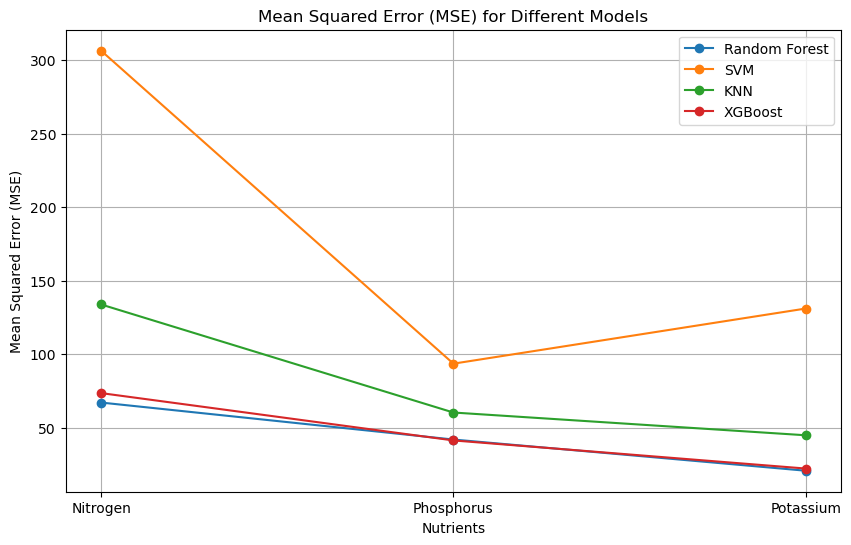

In [18]:
#Line Plot

import matplotlib.pyplot as plt

# Define the MSE values for each model
mse_values = {
    'Random Forest': [67.18459560412293, 42.028495604970594, 20.8153685321004],
    'SVM': [306.5014653308409, 93.63429896114133, 131.13023532925575],
    'KNN': [133.89749999999998, 60.40350000000001, 44.93050000000001],
    'XGBoost': [73.60968403693528, 41.42304153076598, 22.295159541595687]
}

# Labels for the MSE values
labels = ['Nitrogen', 'Phosphorus', 'Potassium']

# Plotting
plt.figure(figsize=(10, 6))
for model, mse_list in mse_values.items():
    plt.plot(labels, mse_list, marker='o', label=model)

plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Nutrients')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


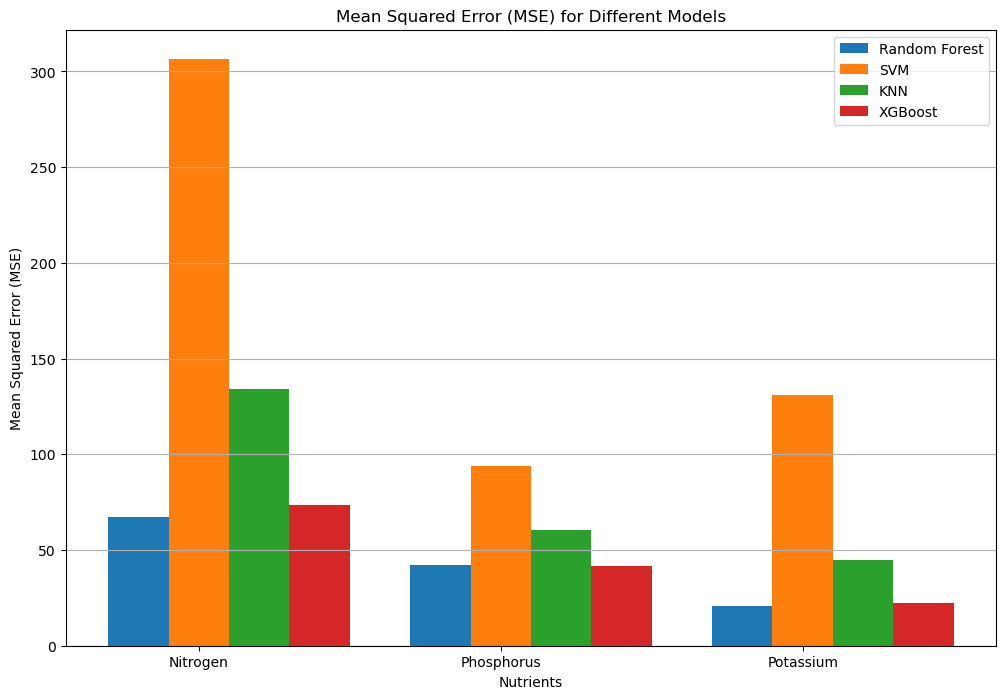

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the MSE values for each model
mse_values = {
    'Random Forest': [67.18459560412293, 42.028495604970594, 20.8153685321004],
    'SVM': [306.5014653308409, 93.63429896114133, 131.13023532925575],
    'KNN': [133.89749999999998, 60.40350000000001, 44.93050000000001],
    'XGBoost': [73.60968403693528, 41.42304153076598, 22.295159541595687]
}

# Labels for the MSE values
labels = ['Nitrogen', 'Phosphorus', 'Potassium']

# Convert the dictionary to a list of values for plotting
models = list(mse_values.keys())
mse_values_array = np.array(list(mse_values.values()))

# Set the positions and width for the bars
x = np.arange(len(labels))
width = 0.2

# Plotting
plt.figure(figsize=(12, 8))
for i, model in enumerate(models):
    plt.bar(x + i * width, mse_values_array[i], width, label=model)

plt.xlabel('Nutrients')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xticks(x + width, labels)
plt.legend()
plt.grid(axis='y')

plt.show()
